<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01273286/blob/main/Notebook_2_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

# Maestría en Inteligencia Artificial Aplicada


> Dra. María de la Paz Rico Fernández


> Curso: Ciencia y Analítica de Datos

> Entregable : Actividad Semanal -- 7 Regresiones y K means NOTEBOOK 2

> Alumno:

*   LUIS ALFONSO SABANERO ESQUIVEL - A01273286

>09/11/2022

> https://github.com/PosgradoMNA/actividades-de-aprendizaje-A01273286

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [115]:
#Importamos las librerias que usaremos en esta actividad 
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from sklearn.cluster import KMeans

import geopandas as gpd
from shapely.geometry import Point
# activate plot theme
import qeds
qeds.themes.mpl_style();

from geopy.geocoders import Nominatim 
from geopy.distance import geodesic 

In [3]:
#Leemos el dataset desde la url
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [25]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [26]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [27]:
#mapa en formato para geopandas

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


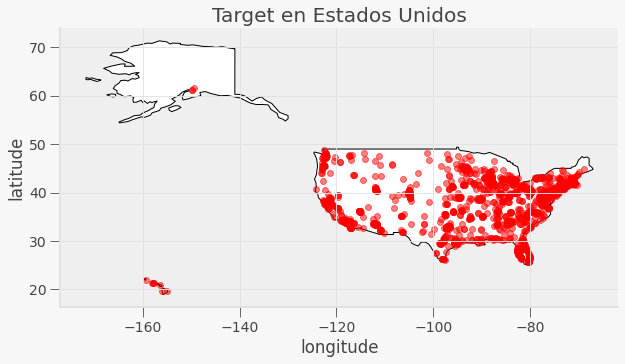

In [51]:
# Ejemplo de la clase: 
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [5]:
latlong=df[["latitude","longitude"]]  #obtenemos el juego de coordenadas

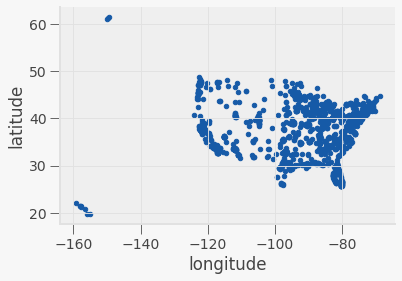

In [6]:
latlong.plot.scatter( "longitude","latitude") #Mostramos el juego de coordenadas

In [7]:
X = latlong[['longitude']]
X

,longitude
0,-86.804174
1,-86.989778
2,-87.895932
3,-86.971559
4,-85.446422
...,...
1834,-88.176840
1835,-88.259806
1836,-106.264166
1837,-104.800048


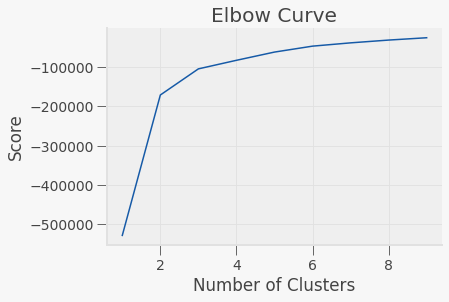

In [8]:
#Vamos a probar con 10 centroides para el kmean
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

#Y = latlong[['latitude']]
#X= latlong[['longitude']]
#El algoritmo es aprendizaje no supervisado por lo que no requerimos una salida, la entrada será latitud y longitud combinada
X=df[["latitude","longitude"]]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

#Imprimimos la grafica de codo para evaluar con cuantos centroides vamos a utilizar
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Encuentra las latitudes y longitudes de los almacenes


In [69]:
kmeans = KMeans(n_clusters = 4) #Se calculan 4 clusters debido a la curva de la grafica ya no presenta tanto cambio
X=df[["longitude","latitude",]]
kmeans.fit(X)
# ahora guardamos los resultados
labels = kmeans.labels_
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[1 1 1 ... 2 2 0]
[[-119.14645561   37.57757741]
 [ -84.51002621   36.54363448]
 [ -96.77504883   37.01782171]
 [ -75.09310265   40.49071268]]


## ¿Qué ciudad es?

In [70]:
#Paso 1 obtenemos el juego de coordenadas para geopandas
centroides_df = pd.DataFrame(centroids) #Transformamos a dataframe para facilidad de uso
centroides_df["Coordinates"] = list(zip(centroides_df[0], centroides_df[1])) #hacemos una columna con latitud y longitud
centroides_df["Coordinates"] = centroides_df["Coordinates"].apply(Point) 
centroides_df.head()

cent = gpd.GeoDataFrame(centroides_df, geometry="Coordinates") #Geopandas requiere coordenadas para funcionar
cent

,0,1,Coordinates
0,-119.146456,37.577577,POINT (-119.14646 37.57758)
1,-84.510026,36.543634,POINT (-84.51003 36.54363)
2,-96.775049,37.017822,POINT (-96.77505 37.01782)
3,-75.093103,40.490713,POINT (-75.09310 40.49071)


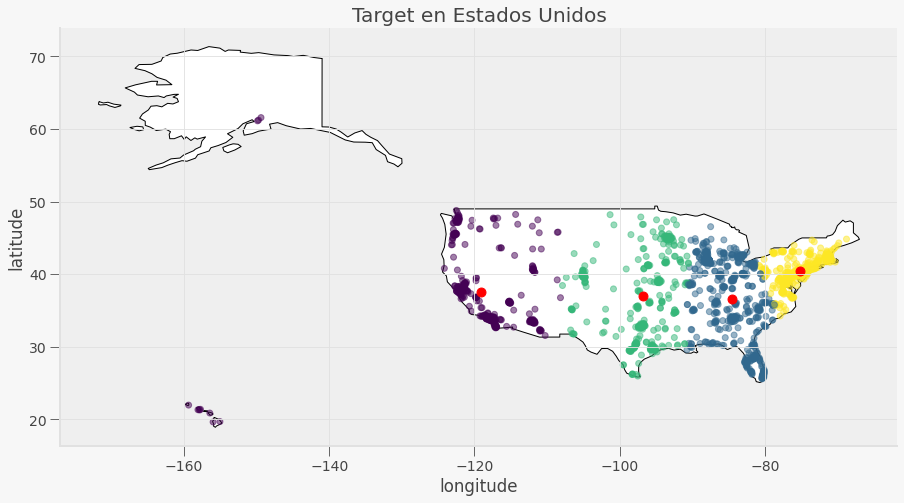

In [128]:
#Con el dataframe de geopandas hecho lo agregamos al codigo de ejemplo
#Usamos el codigo base de la actividad pero le agrearemos un cent.plot con los centroides, el parametro column para poder ver a quien le pertenece cada almacen
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

gdf.plot(ax=gax,column=labels, alpha = 0.5) #Grafica de las tiendas originales
cent.plot(ax=gax, color='red',markersize = 80) #Grafica de centroides del kmeans

#De aqui para abajo es puro ploting busines
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [114]:
#Paso 3 con la libreria geopy se buscara el lugar preciso a las coordernadas obtenidas
#Usaremos Geolocator para obtener la ubicación usando las coordenadas de los kmeans obtenidas
geolocator = Nominatim(user_agent="MNA_DS")

#Armamos una lista con la variable centroides para poder obtener por medio de las coordenadas sus ubicaciones fisicas
#Se usara geolocator para esta acción
#print(centroids)
tienda=list()
tienda.append(str(centroids[0][1])+','+str(centroids[0][0]))
tienda.append(str(centroids[1][1])+','+str(centroids[1][0]))
tienda.append(str(centroids[2][1])+','+str(centroids[2][0]))
tienda.append(str(centroids[3][1])+','+str(centroids[3][0]))


for i in tienda:
    print(i)
    print("Almacen esta en: {} \n".format(geolocator.reverse(i)))

37.57757741219512,-119.14645561138212
Almacen esta en: Mammoth Trail, Madera County, California, United States 

36.54363448327974,-84.51002620610932
Almacen esta en: Scott County, Tennessee, 37841, United States 

37.0178217094431,-96.77504882905569
Almacen esta en: Cowley County, Kansas, United States 

40.490712684367814,-75.09310265080461
Almacen esta en: Headquarters Road, Erwinna, Tinicum Township, Bucks County, Pennsylvania, 18920, United States 



## ¿a cuantas tiendas va surtir?

In [113]:
#Hacemos una columna extra con los labels y posteriormente usamos valuecounts para contar las aparaciones
X['kmeans'] = kmeans.labels_
numero= X['kmeans'].value_counts()
cont=0
for i in numero:
    print("Almacen {} tiene: {}".format(cont, i))
    cont+=1

Almacen 0 tiene: 623
Almacen 1 tiene: 438
Almacen 2 tiene: 409
Almacen 3 tiene: 369


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ¿Sabes a que distancia estará?


In [140]:
#Usamos la lista anterior y el modulo geodesic para calcular la diferencia de distancias entre los 3 almacenes 
#Usaremos Geodesic para poder obtener la distancia en km
tienda=list()
tienda.append(str(centroids[0][1])+','+str(centroids[0][0]))
tienda.append(str(centroids[1][1])+','+str(centroids[1][0]))
tienda.append(str(centroids[2][1])+','+str(centroids[2][0]))
tienda.append(str(centroids[3][1])+','+str(centroids[3][0]))

#Geodesic requiere la longitud y latitud para funcionar
for i in range(len(tienda)):
        for j in range(len(tienda)):
            print("+"*10)
            print("Distancia entre almacén {} y almacen {}: {} km".format(i,j,geodesic(tienda[i], tienda[j]).kilometers))
    



++++++++++
Distancia entre almacén 0 y almacen 0: 0.0 km
++++++++++
Distancia entre almacén 0 y almacen 1: 3065.219214858868 km
++++++++++
Distancia entre almacén 0 y almacen 2: 1979.8109228203584 km
++++++++++
Distancia entre almacén 0 y almacen 3: 3788.4219506756776 km
++++++++++
Distancia entre almacén 1 y almacen 0: 3065.219214858868 km
++++++++++
Distancia entre almacén 1 y almacen 1: 0.0 km
++++++++++
Distancia entre almacén 1 y almacen 2: 1095.361927984148 km
++++++++++
Distancia entre almacén 1 y almacen 3: 930.1046887907029 km
++++++++++
Distancia entre almacén 2 y almacen 0: 1979.8109228203584 km
++++++++++
Distancia entre almacén 2 y almacen 1: 1095.361927984148 km
++++++++++
Distancia entre almacén 2 y almacen 2: 0.0 km
++++++++++
Distancia entre almacén 2 y almacen 3: 1918.5506498856919 km
++++++++++
Distancia entre almacén 3 y almacen 0: 3788.4219506756776 km
++++++++++
Distancia entre almacén 3 y almacen 1: 930.1046887907029 km
++++++++++
Distancia entre almacén 3 y alma

## ¿Cómo elegiste el número de almacenes?

Con base en el modelo K-means elegí usar 4 almacenes en total para la distribución de la mercancía a nivel nacional, esto debido a que después del centroide 4, ya no se notaria una mejora en la distribución, tal como lo representa la gráfica de elbow

Sin embargo, el método kmeans sufre de un mal y es que no puede encontrar siempre el mejor punto para realizar los centroides debido a este efecto, consideraría implementar un almacén extra en la isla de Hawái debido a que la distancia entre mar y continente pueden dar problemas a la empresa. Para ello sería bueno hacer un análisis costo-beneficio con la mesa directiva.


## Conclusiones

* ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?
Durante esta actividad usamos principalmente estas tres librerías geoespaciales para poder encontrar las relaciones entre las coordenadas y poder graficar estos datos:
    * Geopandas
    * matplotlib
    * shapely
    * Geopy
    * Scikit-learn
Es importante considerar que, aunque no todas tienen un impacto en el código para hacer el plot, los datos procesados, coordenadas y centroides son derivados de tales librerías por lo que no hay que ignorarlas
* ¿Consideras importante que se grafique en un mapa?, ¿por qué?
Considero que al trabajar con datos espaciales como lo son las coordenadas, es importante tener un mapa no solo para dimensionar en un espacio físico el lugar que nuestros datos ocupan, sino que también nos dan información útil acerca de las actividades de la empresa, actividad o fenómeno y que alcance usaremos

Como conclusión llego comprender la importancia que los algoritmos no supervisados como el Kmeans, tienen en la industria y como los datos espaciales como el caso de target, nos dan una idea de cómo aplicar las técnicas de machine learning aun caso que puede aplicarse en la vida real


## Referencias

Mapping and Plotting Tools — GeoPandas 0.12.1+0.g195f70b.dirty documentation. (s. f.). https://geopandas.org/en/stable/docs/user_guide/mapping.html

Morales, A. (2021, 24 noviembre). Cómo realizar geocodificación con GeoPy. MappingGIS. https://mappinggis.com/2018/11/geocodificacion-con-geopy/

Elbow Method for optimal value of k in KMeans. (2022, 22 agosto). GeeksforGeeks. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https:\/\/www.aprendemachinelearning.com\/author\/user\/#author. (2018, 12 marzo). K-Means con Python paso a paso. Aprende Machine Learning. https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

Target Store Locations. (2022, 1 noviembre). Kaggle. https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv
